# Exercise 1

### Q:

We consider a database containing geometrical features of iris plants. The dataset can be loaded with the following commands:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None).to_numpy()
A = data[:, :4].T.astype(np.float64)
labels = data[:, 4]
groups = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
```

Each column of the matrix `A` refers to a sample. Each row corresponds to a feature. Specifically:
- the 1st row contains the sepal length in cm;
- the 2nd row contains the sepal width in cm;
- the 3rd row contains the petal length in cm;
- the 4th row contains the petal width in cm.

The vector `labels` contains the class of iris plants each sample belongs to. There are three classes: `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`.

1. How many samples are there in the dataset? How many samples belong to each class?
2. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of:
	- the singular values σ_k;
	- the fraction of the “explained variance” (Σ_i=1^k σ_i^2) / (Σ_i=1^q σ_i^2);
	- the cumulative fraction of singular values (Σ_i=1^k σ_i) / (Σ_i=1^q σ_i).
3. Compute a matrix containing the principal components associated with the dataset.
4. Generate a scatterplot of the first two principal components of the dataset, grouped by label.
5. Comment on the results of point 4, in light of the results of point 2.

### A:

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None).to_numpy()
A = data[:, :4].T.astype(np.float64)
labels = data[:, 4]
groups = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

1. How many samples are there in the dataset? How many samples belong to each class?

In [101]:
# The number of samples corresponds to the length of labels or the columns of A (or rows of danta)
print("Dataset shape: ", data.shape)
print("A shape: ", A.shape)
print("Labels shape: ", labels.shape)
print("Number of samples: ", len(labels), "=", A.shape[1], "=", data.shape[0])

Dataset shape:  (150, 5)
A shape:  (4, 150)
Labels shape:  (150,)
Number of samples:  150 = 150 = 150


2. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of:
	- the singular values σ_k;
	- the fraction of the “explained variance” $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$;
	- the cumulative fraction of singular values $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$;

In [102]:
# Perform PCA
# Center the data and standardize it
A_centered = A - np.mean(A, axis=1)[:, None]

# Compute the SVD
U, s, VT = np.linalg.svd(A_centered, full_matrices=False)

# Note: in U we have the left sigular vectors which can be also seen as the eigenvectors of the covariance matrix
#		furthermore, the singular values s are the square roots of the eigenvalues of the covariance matrix
Uc, sc, VTc = np.linalg.svd(A_centered @ A_centered.T, full_matrices=False)
assert np.allclose(U, Uc)
assert np.allclose(s, np.sqrt(sc))

print("U.shape", U.shape, "s.shape", s.shape, "VT.shape", VT.shape)


U.shape (4, 4) s.shape (4,) VT.shape (4, 150)


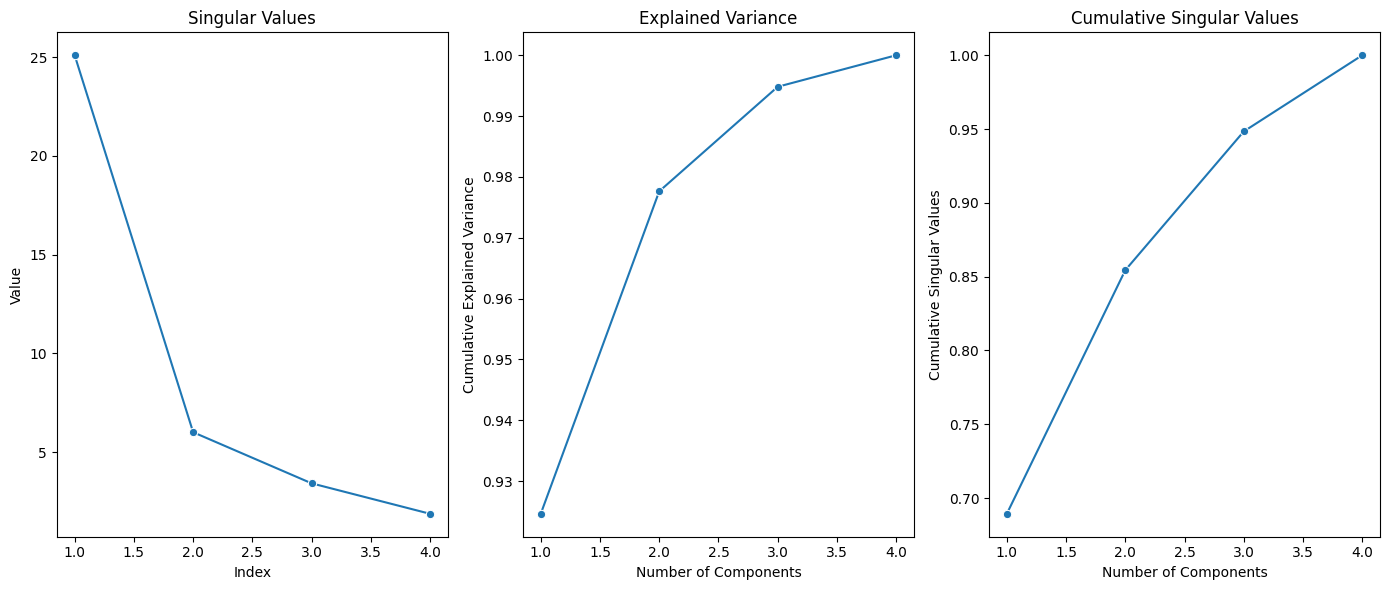

In [103]:
import seaborn as sns

# Plot the singular values, the explained variance and the cumulative explained variance trends in the same plot
# Plot the singular values
plt.figure(figsize=(14, 6))

# Singular values
plt.subplot(1, 3, 1)
sns.lineplot(x=range(1, len(s) + 1), y=s, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')

# Explained variance
explained_variance = np.cumsum(s**2) / np.sum(s**2)
plt.subplot(1, 3, 2)
sns.lineplot(x=range(1, len(s) + 1), y=explained_variance, marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Cumulative singular values
cumulative_singular_values = np.cumsum(s) / np.sum(s)
plt.subplot(1, 3, 3)
sns.lineplot(x=range(1, len(s) + 1), y=cumulative_singular_values, marker='o')
plt.title('Cumulative Singular Values')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Singular Values')

plt.tight_layout()
plt.show()


3. Compute a matrix containing the principal components associated with the dataset.

In [104]:
# 3. Compute a matrix containing the principal components associated with the dataset.

principal_components = np.dot(U.T, A_centered).T

4. Generate a scatterplot of the first two principal components of the dataset, grouped by label.

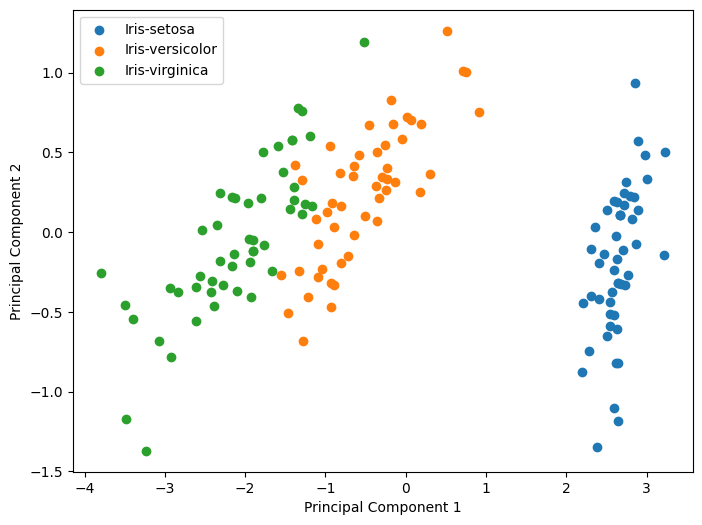

In [105]:
# 4. Generate a scatterplot of the first two principal components of the dataset, grouped by label.

plt.figure(figsize=(8, 6))
for i, group in enumerate(groups):
	plt.scatter(principal_components[labels == group, 0], principal_components[labels == group, 1], label=group)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

5. Comment on the results of point 4, in light of the results of point 2.

The results of point 4 are aligned with what we could have expected from point 2.
We get that the data is widely spread along the axis described by the first principal component direction, and also spread around the second principal component but at a lower order of magnitude (from about -4/4 to -1/1).

We can actually note how the first principal component alone provide a good distinction between the different types of iris. 

We can actually find a simple classifier that have good result based only on the two first principal components. This is in line with the fact that along these two direction actually lies 98% of the total variance of the dataset.

# Exercise 2 

### Q:

Give a brief explaination of the Gradient Descent method and motivate the introduction of the
Stochastic Gradient Descent (SGD).

Consider the following dataset:

```python
import numpy as np
m = 100
noise = 1.0
coeff_exact = np.array([5.0, 1.0])
np.random.seed(0)
X = np.c_[[1]*100, 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)
```

Use the SGD to fit a linear model to these data. Initialize the two unknown parameters using `np.random.randn(2)` and find suitable values for the learning rate and for the number of epochs; motivate your choices.

### A:

Gradient Descent is an optimization algorithm used to minimize functions, specifically
in the machine learning context, to minimize the cost function of a model.
Gradient descent guarantees convergence to global minima for convex functions and 
for non-convex functions to local minima. 
The algorithm is iterative and updates the parameters of the model in the direction of 
the negative gradient of the cost function. With an update function in the form of:

$ \theta = \theta - \alpha \nabla J(\theta) $

where:
- $ \theta $ represents the model parameters,
- $ \alpha $ is the learning rate,
- $ J(\theta) $ is the cost function (or in general the function we want to minimize),
- $ \nabla J(\theta) $ is the gradient of the function with respect to the parameters.

While Gradient Descent is effective, it can be computationally expensive for large datasets 
because it requires computing the loss function and its gradient over the entire dataset at 
each iteration.

Stochastic Gradient Descent (SGD) addresses the computational issue by updating the model 
parameters based only a single training example (or a small batch for mini-batch SGD) at 
each iteration. The main idea is that by randomly sampling the training examples, we are using
an unbiased estimate of the gradient, which allow us to perform much faster iterations. 
So we will obtain a computationally faster convergence (we reduce the time to compute an update 
but the number of iterations required will be typically higher due to a noiser convergence which 
can however help to avoid overfitting).
The update rule for SGD is:

$ \theta = \theta - \alpha \nabla J(\theta; x^{(i)}, y^{(i)}) $

where $ (x^{(i)}, y^{(i)}) $ is a single training example.

In [106]:
import numpy as np
m = 100
noise = 1.0
coeff_exact = np.array([5.0, 1.0])
np.random.seed(0)
X = np.c_[[1]*100, 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)

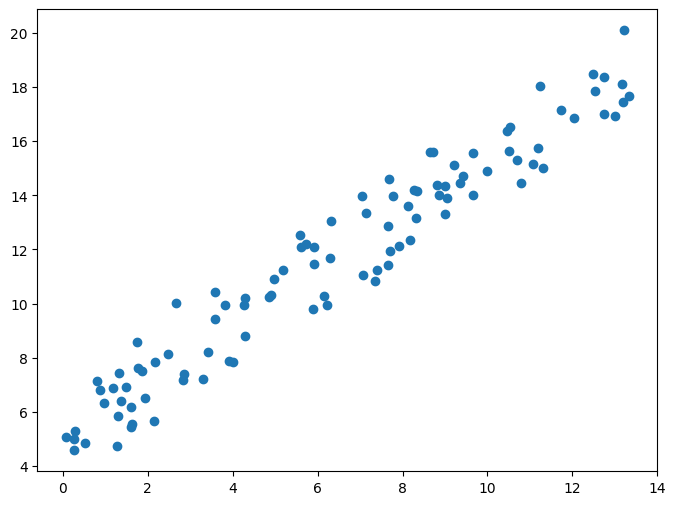

In [107]:
# display the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y)

In [130]:
from tqdm.notebook import tqdm
import seaborn as sns

def mean_squared_error_linear(coeff, X, y):
	# Compute the mean squared error
	return np.mean((X @ coeff - y) ** 2)

def SGD_linear(coeff, X, y, loss, grad_loss, lr=1e-2, epochs=100):
	losses = []
	for epoch in tqdm(range(epochs)):
		# Shuffle the data
		indices = np.random.permutation(len(X))
		data = X[indices]
		labels = y[indices]		
		for i in range(len(data)):
			coeff = coeff - lr * grad_loss(coeff, data[i:i+1], labels[i:i+1])
		losses.append(loss(coeff, X, y))
	return coeff, losses

def plot_model_data(coeff, X, y):
	plt.figure(figsize=(10, 6))
	sns.scatterplot(x=X[:, 1], y=y, label='Data')
	sns.lineplot(x=X[:, 1], y=X @ coeff, color='red', label='Fitted line')
	plt.xlabel('X')
	plt.ylabel('y')
	plt.legend()
	plt.show()

def plot_losses(losses):
	plt.figure(figsize=(10, 6))
	sns.lineplot(x=range(len(losses)), y=np.log(np.array(losses)))
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

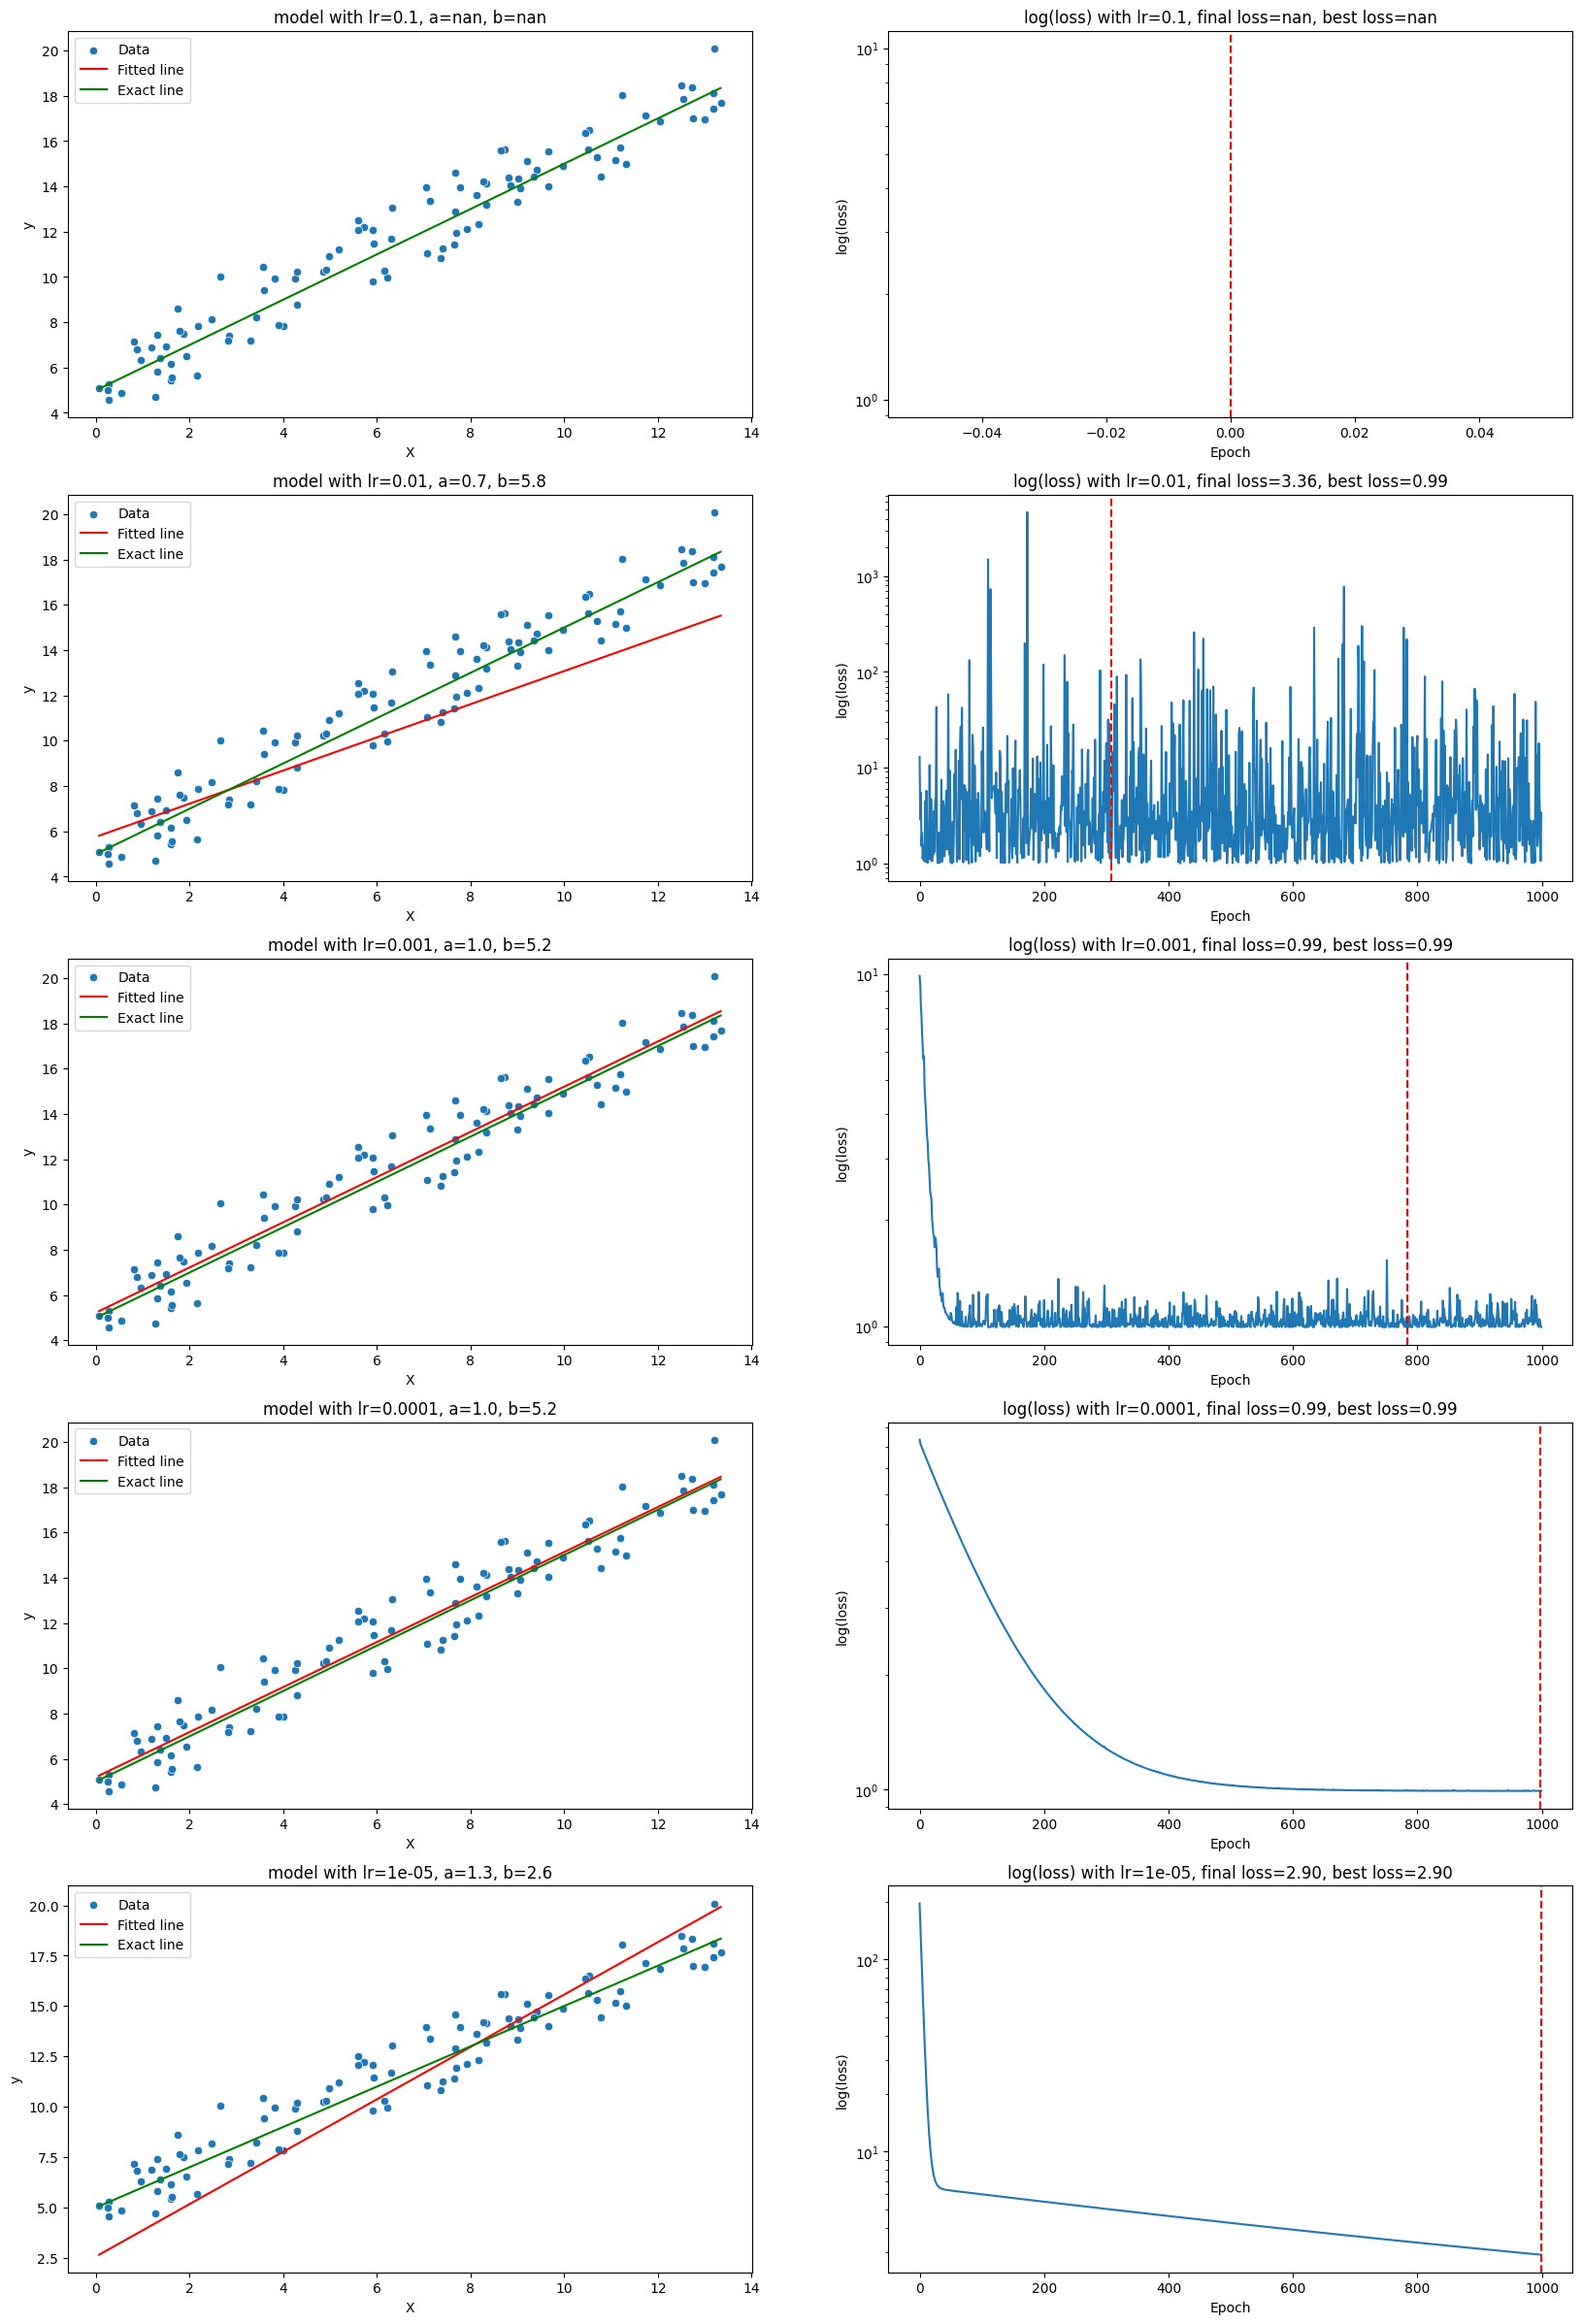

In [140]:
import jax

coeff = np.random.randn(2)
loss_jit = jax.jit(mean_squared_error_linear)
grad_loss_jit = jax.jit(jax.grad(mean_squared_error_linear, argnums=0))


lrs = [10**-i for i in range(1, 6)]
epochs = 1000
fig, axs = plt.subplots(len(lrs), 2, figsize=(20, 6*len(lrs)))
for i, lr in enumerate(lrs):
	coeff = np.random.randn(2)
	coeff, losses = SGD_linear(coeff, X, y, loss_jit, grad_loss_jit, lr=lr, epochs=epochs)
	axs[i, 0].set_title(f'model with lr={lr}, a={coeff[1]:.1f}, b={coeff[0]:.1f}')
	axs[i, 1].set_title(f'log(loss) with lr={lr}, final loss={losses[-1]:.2f}, best loss={np.min(losses):.2f}')
	axs[i, 0].set_xlabel('X')
	axs[i, 0].set_ylabel('y')
	axs[i, 1].set_xlabel('Epoch')
	axs[i, 1].set_ylabel('log(loss)')
	sns.scatterplot(x=X[:, 1], y=y, label='Data', ax=axs[i, 0])
	sns.lineplot(x=X[:, 1], y=X @ coeff, color='red', label='Fitted line', ax=axs[i, 0])
	sns.lineplot(x=X[:, 1], y=X @ coeff_exact, color='green', label='Exact line', ax=axs[i, 0])
	min_loss = np.argmin(losses)
	axs[i, 1].semilogy(losses)
	axs[i, 1].axvline(min_loss, color='red', linestyle='--')
plt.show()

In [138]:
# exact mean squared error
exact_mse = mean_squared_error_linear(coeff_exact, X, y)
print("Exact mean squared error: ", exact_mse)

Exact mean squared error:  1.0297617241074744


#### Comment on the results:

The results of SGD are not perfect given that the best result having a mean squared error even better than the one obtained with the exact coefficients (~1.03). 
In particular a good choice of the learning rate would be between 1e-3 and 1e-4 where the algorithm converges to a good result in a reasonable number of epochs (~100 for 1e-3 and ~1000 for 1e-4).
The tradeoff would be between the computational time and the precision of the result due to the noidy behaviour when the learning rate is too high.
It is also nice to note how when the learning rate is too high SGD does not converge and when the learning rate is too low the algorithm converges in a much higher number of epochs.

# Exercise 3

### Q:

Consider the neural network in Figure 1 with input x ∈ R, 3 hidden layers with one node each and one output
y ∈ R.

![Figure 1](./3_image.png)

In the network each node corresponds to the sigmoid of the previous node multiplied by some weight i.e. $a_i = \sigma(w_i a_{i-1})$, $i = 1, \ldots, 4$ where $a_0 = x$ and $a_4 = y$.

- By using the chain rule compute $\frac{\partial y}{\partial x}$.
- Compute the maximum of $\sigma'$ and discuss how this is related to the vanishing gradients problem.



### A:

#### Chain rule:
$$ \frac{\partial y}{\partial x} = \frac{\partial y}{\partial a_3} \frac{\partial a_3}{\partial a_2} \frac{\partial a_2}{\partial a_1} \frac{\partial a_1}{\partial x} $$

$$ \frac{\partial y}{\partial a_3} = \frac{\partial}{\partial a_3} \sigma(w_3 a_2) = w_3 \sigma'(w_3 a_2) $$
$$ \frac{\partial a_3}{\partial a_2} = \frac{\partial}{\partial a_2} \sigma(w_2 a_1) = w_2 \sigma'(w_2 a_1) $$
$$ \frac{\partial a_2}{\partial a_1} = \frac{\partial}{\partial a_1} \sigma(w_1 a_0) = w_1 \sigma'(w_1 a_0) $$

$$ where \quad \sigma'(x) = \sigma(x)(1-\sigma(x)) $$

so:

$$ \frac{\partial y}{\partial x} = w_3 \sigma'(w_3 a_2) w_2 \sigma'(w_2 a_1) w_1 \sigma'(w_1 a_0) $$
$$ \frac{\partial y}{\partial x} = w_3 w_2 w_1 \sigma(w_3 a_2) * (1 - \sigma(w_3 a_2)) \sigma(w_2 a_1) * (1 - \sigma(w_2 a_1)) \sigma(w_1 a_0) * (1 - \sigma(w_1 a_0)) $$

#### Vanishing gradients problem:


The vanishing gradients problem is related to the fact that the derivative of the sigmoid function is maximum in the range of +-0.25 while having very small values whenever the input has |x|>4. 
This means that the gradient of the loss function will be multiplied by a number much smaller than 1 at each layer of the network. 
This will lead to the gradient being vanishingly small at the beginning of the network and will not be able to update the weights of the network.


$$ \frac{\partial y}{\partial x} <= 0.015625 * w_3 w_2 w_1$$
and often $\frac{\partial y}{\partial x} << 0.015625 * w_3 w_2 w_1$.


In particular the weights of the first layers will be updated very slowly when compared to the weights of the last layers whatevers the learning rate is.
This is a problem with often no straightforward solution and is often mitigated by using different activation functions such as ReLU or using batch normalization.